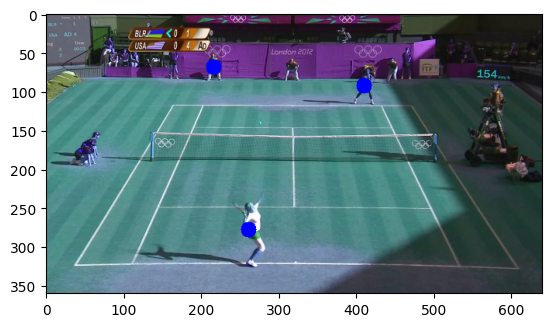

In [1]:
from tennis_tracker.download_data.extract_keypoints import read_json_file
import cv2
import numpy as np
from tennis_tracker.player_location.homography import transform_points
FILE_PATH = "/Users/derek/Desktop/tennis_tracker/tennis_tracker/ball_tracking/clean_labels_V010_v2.json"

data = read_json_file(FILE_PATH)

def split_box(box):
    split_box = box.split(" ")[1:]
    split_box = [float(x) for x in split_box]
    return split_box

def get_next_frame(data_entry: dict, court_image: np.array, key: str):
    """We want to get tracked points and draw them on the court image"""
    # tracked_points = data_entry["transformed_coords"]
    m = np.array(data_entry["m"])
    boxes = [split_box(box) for box in data_entry["boxes"]]
    # boxes = [[0.3, 0.3, 0.001, 0.001]]
    # transformed_coords = transform_points(m, boxes, data_entry["image_dims"])
    transformed_coords = data_entry["transformed_coords"]
    path = data_entry["actual_path"]
    # path = key
    
    original_image = cv2.imread(path)
    original_image = cv2.resize(original_image, data_entry["image_dims"])
    for point in boxes:
        point[0] = int(point[0] * original_image.shape[1])
        point[1] = int(point[1] * original_image.shape[0])
        cv2.circle(original_image, [int(p) for p in point[:2]], 10, (0, 0, 255), -1)
        
    for point in transformed_coords:
        cv2.circle(court_image, [int(p) for p in point[:2]], 10, (0, 255, 0), -1)
    return original_image, boxes

key = list(data.keys())[0]
court_image = cv2.imread(
    "/Users/derek/Desktop/tennis_tracker/tennis_tracker/player_location/padded_court.jpg"
)
original_image, tracked_points = get_next_frame(data[key], court_image, key)

import matplotlib.pyplot as plt

plt.imshow(original_image)
plt.show()

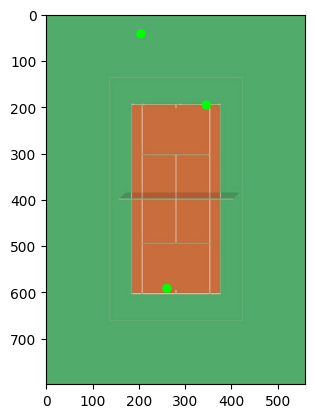

In [2]:
import matplotlib.pyplot as plt

plt.imshow(court_image)
plt.show()

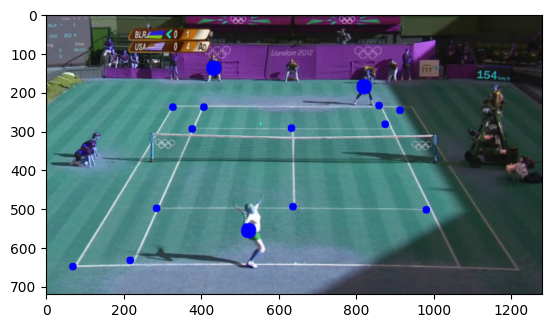

In [3]:
def plot_keypoints(keypoints: list, image: np.array):
    for point in keypoints:
        cv2.circle(image, [int(p) for p in point], 10, (0, 0, 255), -1)
    plt.imshow(image)
    plt.show()
    
keypoints = data[key]["keypoints"]
original_image = cv2.resize(original_image, (640 * 2, 360 * 2))
plot_keypoints(keypoints, original_image)